In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [26]:
df=pd.read_csv(r"C:\Users\Vansh\file1.csv")
df=df.drop(['Unnamed: 0'],axis=1)
# df=df.drop(['Series'],axis=1)
# df=df.drop(['Prev Close'],axis=1)
# df=df.drop(['Last'],axis=1)
# df=df.drop(['VWAP'],axis=1)
# df=df.drop(['Turnover'],axis=1)
# df=df.drop(['Trades'],axis=1)
# df=df.drop(['Deliverable Volume'],axis=1)
# df=df.drop(['%Deliverble'],axis=1)
df

,time,open,high,low,close
0,2021-01-01 09:25:00,1988.00,1993.25,1986.00,1988.70
1,2021-01-01 09:40:00,1988.70,1989.70,1982.20,1986.00
2,2021-01-01 09:55:00,1986.00,1988.00,1985.00,1986.80
3,2021-01-01 10:10:00,1987.00,1988.00,1985.50,1986.75
4,2021-01-01 10:25:00,1986.20,1991.50,1986.20,1988.70
...,...,...,...,...,...
17906,2023-11-30 14:25:00,2382.50,2383.15,2379.00,2382.40
17907,2023-11-30 14:40:00,2382.35,2383.25,2379.20,2381.00
17908,2023-11-30 14:55:00,2380.95,2382.65,2380.40,2382.20
17909,2023-11-30 15:10:00,2382.10,2382.15,2376.75,2379.00


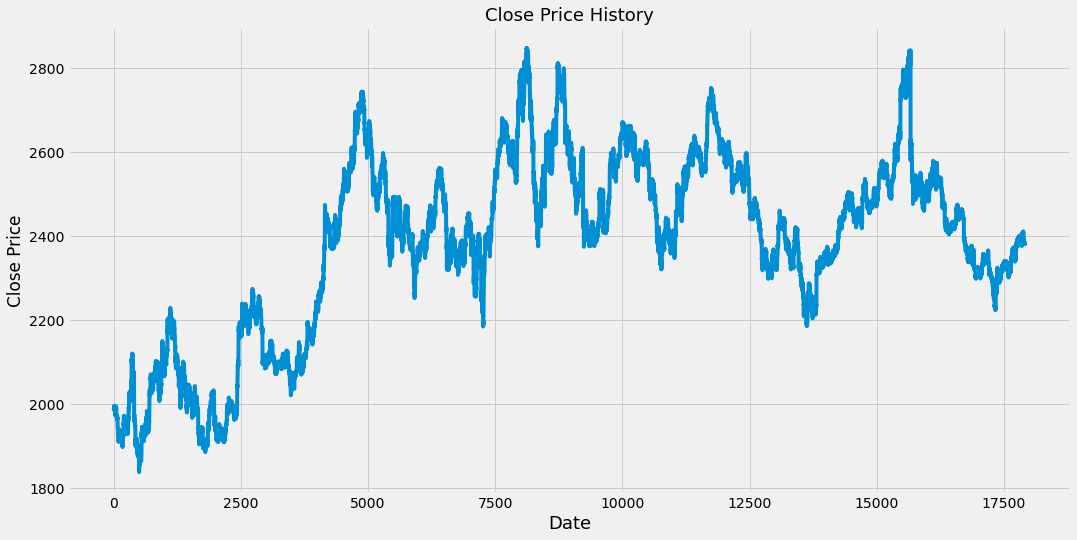

In [28]:
plt.figure(figsize=(16,8))
plt.title("Close Price History",fontsize=18)
plt.plot(df['close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price')
plt.show()

In [29]:
def SMA(data,period=30,column='close'):
    return data[column].rolling(window=period).mean()

In [30]:
df['SMA']=SMA(df,21)

In [31]:
df['close'] = pd.to_numeric(df['close'], errors='coerce')
df['Simple_Returns'] = df['close'].pct_change(1)
df['Log_Returns']=np.log(1+df['Simple_Returns'])
df['Ratios']=df['close']/df['SMA']

In [32]:
df

,time,open,high,low,close,SMA,Simple_Returns,Log_Returns,Ratios
0,2021-01-01 09:25:00,1988.00,1993.25,1986.00,1988.70,NaN,NaN,NaN,NaN
1,2021-01-01 09:40:00,1988.70,1989.70,1982.20,1986.00,NaN,-0.001358,-0.001359,NaN
2,2021-01-01 09:55:00,1986.00,1988.00,1985.00,1986.80,NaN,0.000403,0.000403,NaN
3,2021-01-01 10:10:00,1987.00,1988.00,1985.50,1986.75,NaN,-0.000025,-0.000025,NaN
4,2021-01-01 10:25:00,1986.20,1991.50,1986.20,1988.70,NaN,0.000982,0.000981,NaN
...,...,...,...,...,...,...,...,...,...
17906,2023-11-30 14:25:00,2382.50,2383.15,2379.00,2382.40,2385.500000,-0.000189,-0.000189,0.998700
17907,2023-11-30 14:40:00,2382.35,2383.25,2379.20,2381.00,2385.157143,-0.000588,-0.000588,0.998257
17908,2023-11-30 14:55:00,2380.95,2382.65,2380.40,2382.20,2385.076190,0.000504,0.000504,0.998794
17909,2023-11-30 15:10:00,2382.10,2382.15,2376.75,2379.00,2384.883333,-0.001343,-0.001344,0.997533


In [33]:
df['Ratios'].describe()

count    17891.000000
mean         1.000113
std          0.007297
min          0.919013
25%          0.996324
50%          1.000084
75%          1.003710
max          1.042801
Name: Ratios, dtype: float64

In [36]:
percentiles=[5,20,50,80,95]
ratios=df['Ratios'].dropna()
percentile_values=np.percentile(ratios,percentiles)
percentile_values

array([0.98897069, 0.99528503, 1.00008385, 1.0047449 , 1.01165136])

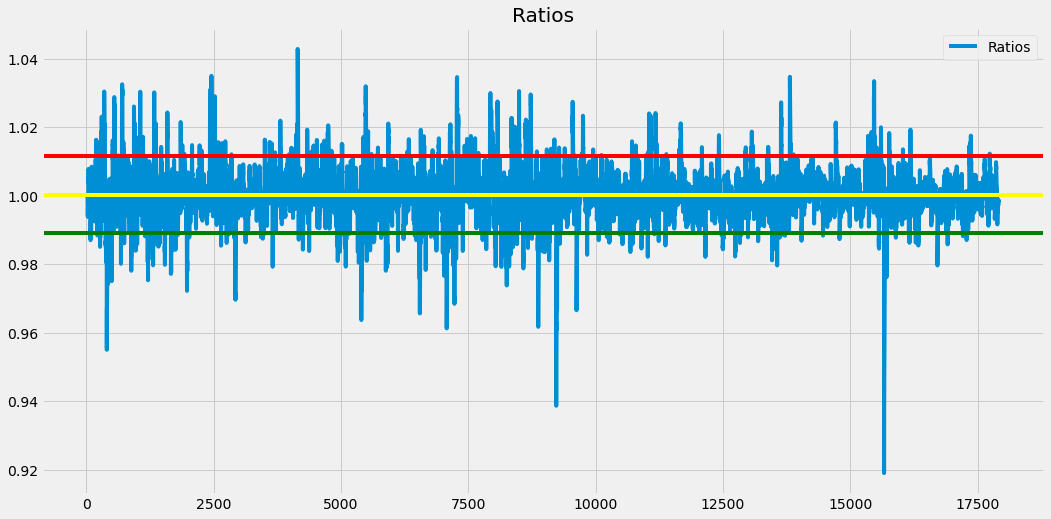

In [37]:
plt.figure(figsize=(16,8))
plt.title('Ratios')
df['Ratios'].dropna().plot(legend=True)
plt.axhline(percentile_values[0],c='Green',label='10th Percentile')
plt.axhline(percentile_values[2],c='Yellow',label='50th Percentile')
plt.axhline(percentile_values[-1],c='Red',label='90th Percentile')

In [38]:
buy=percentile_values[0]
sell=percentile_values[-1]

In [39]:
df['Positions']=np.where(df.Ratios>sell,-1,np.nan)
df['Positions']=np.where(df.Ratios<buy,1,df['Positions'])
df['Positions']=df['Positions'].ffill()

In [40]:
df

,time,open,high,low,close,SMA,Simple_Returns,Log_Returns,Ratios,Positions
0,2021-01-01 09:25:00,1988.00,1993.25,1986.00,1988.70,NaN,NaN,NaN,NaN,NaN
1,2021-01-01 09:40:00,1988.70,1989.70,1982.20,1986.00,NaN,-0.001358,-0.001359,NaN,NaN
2,2021-01-01 09:55:00,1986.00,1988.00,1985.00,1986.80,NaN,0.000403,0.000403,NaN,NaN
3,2021-01-01 10:10:00,1987.00,1988.00,1985.50,1986.75,NaN,-0.000025,-0.000025,NaN,NaN
4,2021-01-01 10:25:00,1986.20,1991.50,1986.20,1988.70,NaN,0.000982,0.000981,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
17906,2023-11-30 14:25:00,2382.50,2383.15,2379.00,2382.40,2385.500000,-0.000189,-0.000189,0.998700,-1.0
17907,2023-11-30 14:40:00,2382.35,2383.25,2379.20,2381.00,2385.157143,-0.000588,-0.000588,0.998257,-1.0
17908,2023-11-30 14:55:00,2380.95,2382.65,2380.40,2382.20,2385.076190,0.000504,0.000504,0.998794,-1.0
17909,2023-11-30 15:10:00,2382.10,2382.15,2376.75,2379.00,2384.883333,-0.001343,-0.001344,0.997533,-1.0


In [44]:
df['Buy']=np.where(df.Positions==1,df['close'],np.nan)
df['Sell']=np.where(df.Positions==-1,df['close'],np.nan)

In [45]:
df

,time,open,high,low,close,SMA,Simple_Returns,Log_Returns,Ratios,Positions,Buy,Sell
0,2021-01-01 09:25:00,1988.00,1993.25,1986.00,1988.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-01 09:40:00,1988.70,1989.70,1982.20,1986.00,NaN,-0.001358,-0.001359,NaN,NaN,NaN,NaN
2,2021-01-01 09:55:00,1986.00,1988.00,1985.00,1986.80,NaN,0.000403,0.000403,NaN,NaN,NaN,NaN
3,2021-01-01 10:10:00,1987.00,1988.00,1985.50,1986.75,NaN,-0.000025,-0.000025,NaN,NaN,NaN,NaN
4,2021-01-01 10:25:00,1986.20,1991.50,1986.20,1988.70,NaN,0.000982,0.000981,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
17906,2023-11-30 14:25:00,2382.50,2383.15,2379.00,2382.40,2385.500000,-0.000189,-0.000189,0.998700,-1.0,NaN,2382.40
17907,2023-11-30 14:40:00,2382.35,2383.25,2379.20,2381.00,2385.157143,-0.000588,-0.000588,0.998257,-1.0,NaN,2381.00
17908,2023-11-30 14:55:00,2380.95,2382.65,2380.40,2382.20,2385.076190,0.000504,0.000504,0.998794,-1.0,NaN,2382.20
17909,2023-11-30 15:10:00,2382.10,2382.15,2376.75,2379.00,2384.883333,-0.001343,-0.001344,0.997533,-1.0,NaN,2379.00


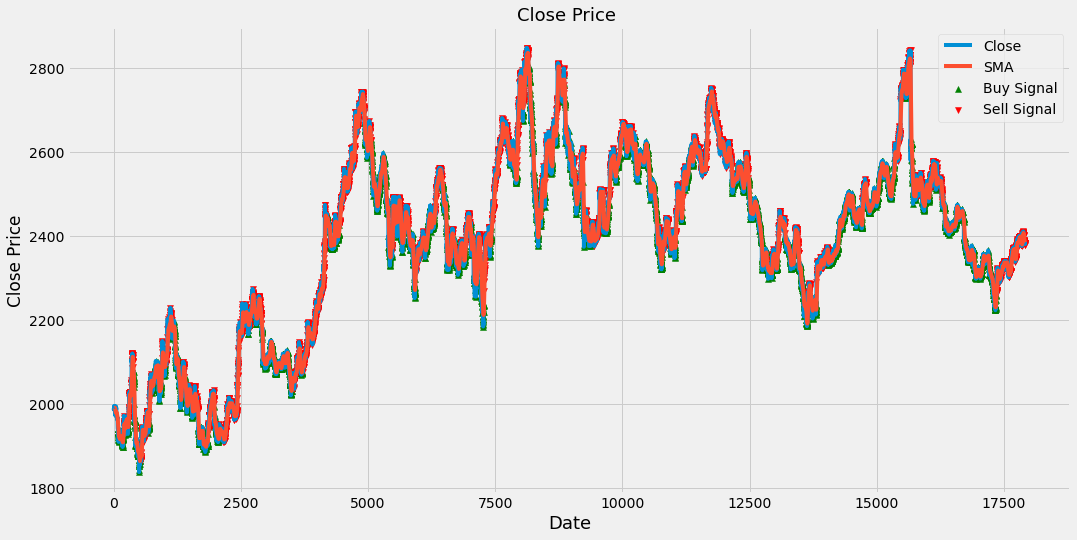

In [50]:
plt.figure(figsize=(16,8))
plt.title("Close Price ",fontsize=18)
plt.plot(df['close'],alpha=1,label='Close')
plt.plot(df['SMA'],alpha=1,label='SMA')
plt.scatter(df.index,df['Buy'],color='green',label='Buy Signal',marker='^',alpha=1)
plt.scatter(df.index,df['Sell'],color='red',label='Sell Signal',marker='v',alpha=1)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price')
plt.legend()
plt.show()